
# TELECOM ParisTech MDI720 2016/2017 Joseph Salmon
# Devoir maison no 1 : Introduction à python et modèle linéaire
## Exercice 1. (Expérience de Galton)



### Q1 Récupérer les données du fichier http://www.math.uah.edu/stat/data/Galton.csv et charger les avec Pandas. On utilisera read_csv pour cela et on transformera les tailles en cm1, en arrondissant sans chiffre après la virgule.

In [407]:
# python version 3
# import des librairies
import pandas as pd
import urllib
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats.kde as kde
from mpl_toolkits.mplot3d import Axes3D # pour graph en 3D
from sklearn import preprocessing # pour normalisation et centrage des données

# afficher les graphisues dans l'interface
% matplotlib inline

url_file = u'http://www.math.uah.edu/stat/data/Galton.csv'
fileseparator = ','

# df = pd.read_csv('http://www.math.uah.edu/stat/data/Galton.csv')
# df = pd.read_csv(url + filename + '.' +fileformat)
df = pd.read_csv(url_file, sep=fileseparator)

print_resultat('fichier avant transformation')
print_resultat(df[0:3])
# transformer taille en cm Iinch = 2,54 cm et arrondir avec 0 decimale
df['Height'] = np.rint(2.54 * df['Height'])
df['Father'] = np.rint(2.54 * df['Father'])
df['Mother'] = np.rint(2.54 * df['Mother'])

print_resultat('fichier après transformation')
print_resultat(df[0:3])
print_resultat('description du DF créé')
print_resultat(df.describe())


fichier avant transformation
  Family  Father  Mother Gender  Height  Kids
0      1    78.5    67.0      M    73.2     4
1      1    78.5    67.0      F    69.2     4
2      1    78.5    67.0      F    69.0     4
fichier après transformation
  Family  Father  Mother Gender  Height  Kids
0      1   199.0   170.0      M   186.0     4
1      1   199.0   170.0      F   176.0     4
2      1   199.0   170.0      F   175.0     4
description du DF créé
       Father   Mother   Height     Kids
count  898.00  898.000  898.000  898.000
mean   175.86  162.761  169.567    6.136
std      6.21    5.904    9.109    2.685
min    157.00  147.000  142.000    1.000
25%    173.00  160.000  163.000    4.000
50%    175.00  163.000  169.000    6.000
75%    180.00  166.000  177.000    8.000
max    199.00  179.000  201.000   15.000


### Q2 Combien de données manquantes y-t-il dans cette base de données ? Enlever si besoin les lignes ayant des données manquantes.

In [381]:
print_resultat ('Il y-t-il des valeurs nulles dans le DF ?')
print_resultat (np.all(pd.isnull(df)))

# suppression des lignes avec valeur vide NaN, pas nécessaire dans notre cas
# df = df.dropna()

Il y-t-il des valeurs nulles dans le DF ?
False


### Q3 Afficher un estimateur de la densité de la population des père en bleu, et de celles des mères en violet.

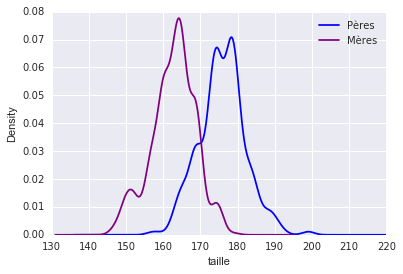

In [382]:
# utilisation de la bibliothèque 'Kernel Density Estimation' (KDE) dans Python

plt.hold(1) # garder la figure et continuer de rajouter des éléments
df['Father'].plot.kde(color='blue' , label = 'Pères')
df['Mother'].plot.kde(color='purple', label = 'Mères')
plt.xlabel("taille")
plt.legend(loc='best')

### Q4 Afficher sur un même graphique la taille du père en fonction de la traille de la mère pour les n observations figurant dans les données. Ajouter la droite de prédiction obtenue par la méthode des moindres carrés (avec constante et sans centrage/normalisation).

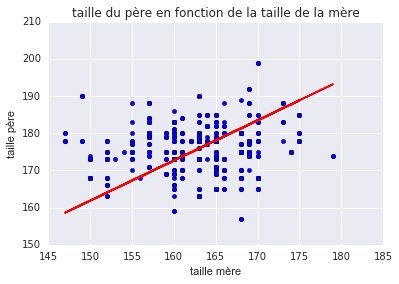

In [383]:
from sklearn import linear_model 
plt.scatter(df['Mother'],df['Father'] , marker = 'o' )

X = df[['Mother']]
y = df['Father']

# Fit regression model (with sklearn)
skl_linmod = linear_model.LinearRegression(fit_intercept=False, normalize=False)
skl_linmod.fit(X, y)

plt.plot(X, skl_linmod.predict(X), color='r')
plt.xlabel("taille mère")
plt.ylabel("taille père")
plt.title("taille du père en fonction de la taille de la mère")  

### Q5 Afficher un histogramme du nombre d’enfants par famille.

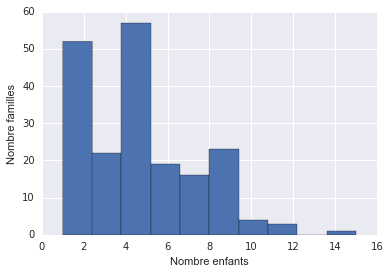

In [384]:
# regrouper les données par famille  pour avoir une ligne par famille avec le nombre d'enfants
nbKids = df.groupby(['Family']).first()
plt.hist(nbKids['Kids']) # histogramme sur nb enfants

plt.xlabel('Nombre enfants')
plt.ylabel('Nombre familles')

### Q6 Créer une colonne supplémentaire appelée 'MeanParents', qui contient la taille du “parent moyen”, c’est-à-dire ('Father'+ 1.08 * 'Mother')/2.

In [385]:
# Création de la colonne 'MeanParents'
df['MeanParents'] = (df['Father'] + 1.08*df['Mother'])/2

Pour la ${i^e}$ observation, on note $x_{i}$ la taille du parent moyen et $y_{i}$ la taille de l’enfant. On se base sur le modèle linéaire suivant : $y_{i}$ = $\theta_{0}$ + $\theta_{1}$$x_{i}$  + $\epsilon_{i}$
 et on suppose que les variables $\epsilon_{i}$  sont centrées, indépendantes et de même variance $\sigma^2$  inconnue.

### Q7 Estimer $\theta_{0}  , \theta_{1}$ , par $\hat\theta_{O}$ , $\hat\theta_{1}$ en utilisant la fonction LinearRegression de sklearn, puis vérifier numériquement 2 les formules vues en cours pour le cas unidimensionnel $\hat\Theta _{0} =  \bar y _{n}  - \hat\Theta _{1}  \bar x_{n}$  ,   $\frac{\sum_{i=1}^{n} (x_{i} - \bar x_{n} )(y_{i} - \bar y_{n} )}{\sum_{i=1}^{n} (x_{i} - \bar x_{n} )^{2}}$ . On fera attention aux normalisations utilisées pour la variance qui peuvent changer selon les packages.

In [386]:
# preparer observations et y pour le modèle linéaire 
X = df[['MeanParents']]
y = df['Height']

# Fit regression model (with sklearn)
skl_linmod = linear_model.LinearRegression(fit_intercept=True)
skl_linmod.fit(X, y)

print_resultat("En utilisant la fonction LinearRegression de sklearn :")
print("  θ0 (intercept_) = ", skl_linmod.intercept_)
print("  θ1 (coef_)      = ", skl_linmod.coef_[0])

x_mean = df['MeanParents'].mean()  # moyenne
y_mean = df['Height'].mean()  # moyenne

# formule pour T1 = sum((df['MeanParents'] - x_mean) * (df['Height'] - y_mean))/(sum (df['MeanParents']-x_mean)**2)
h = np.dot(df['MeanParents'] - x_mean, df['Height'] - y_mean)

# pour ^2 on multiplie le vecteur avec sont transposé
b = np.vdot((df['MeanParents'] - x_mean), (df['MeanParents'] - x_mean).T)

θ1 = h / b
θ0 = y_mean - T1 * x_mean

print_resultat("En utilisant la formule :")
print("  θ0 calculé = ", θ0)
print("  θ1 calculé = ", θ1)


En utilisant la fonction LinearRegression de sklearn :
  θ0 (intercept_) =  58.255916588
  θ1 (coef_)      =  0.633093766663
En utilisant la formule :
  θ0 calculé =  58.255916588
  θ1 calculé =  0.633093766663


### Q8 Calculer et visualiser les valeurs prédites  $y_{i} = \theta_{0} + \theta_{1}x_{i}$  et les $y_{i}$ sur un même graphique. On affichera de deux couleurs différentes les garçons et les filles.

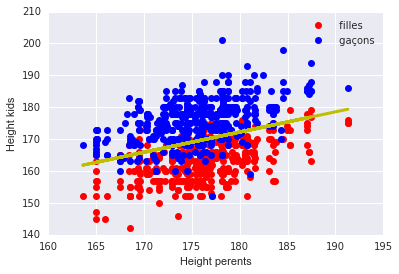

In [387]:
# création de 2 DF : pour filles et pour garçons
df_f = df[df['Gender'] == 'F']  # pour filles
df_g = df[df['Gender'] == 'M']  # pour garçons

# creation de graphique
plt.plot(df_f['MeanParents'], df_f['Height'], 'o', color='r', label=' filles')
plt.plot(df_g['MeanParents'], df_g['Height'], 'o', color='b', label=' gaçons')
# tracer la ligne estimation
plt.plot(X, skl_linmod.predict(X), color='y', lw=3.0)

plt.xlabel('Height perents')
plt.ylabel('Height kids')
plt.legend(loc='best')
plt.figure()

### Q9 Visualiser un estimateur de la densité des résidus $r_{i} = \hat\theta_{0} + \hat\theta_{1} x_{i}$. L’hypothèse de normalité est-elle crédible selon vous ? On ajoutera ensuite un estimateur par genre de la densité des résidus (en mettant un facteur proportionnelle au nombre de personnes de chaque genre).

graphique avec courbes sans coeficients


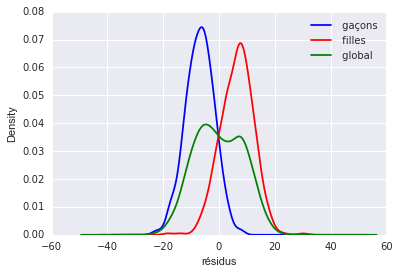

In [388]:
print_resultat("graphique avec courbes sans coeficients")



df_r_f = (df_f['Height'] - skl_linmod.predict(df_f[['MeanParents']]) )
df_r_g = (df_g['Height'] - skl_linmod.predict(df_g[['MeanParents']]) )
df_r_all = df['Height'] - skl_linmod.predict(df[['MeanParents']])

# densite 
df_r_f.plot.kde(color='b' , label = ' gaçons')
df_r_g.plot.kde(color='r' , label = ' filles')
df_r_all.plot.kde(color='g', label = ' global' )


#import seaborn as sns;

plt.xlabel('résidus')
plt.legend(loc='best')


graphique avec courbes reduites du facteur
 proportionnelle au nombre de personnes de chaque genre


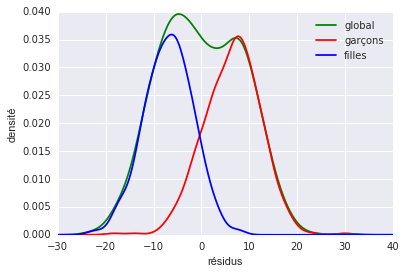

In [389]:
print_resultat("graphique avec courbes reduites du facteur\n proportionnelle au nombre de personnes de chaque genre")

coef_f = (df_f.shape[0])/(df.shape[0]) # coeficient pour filles
coef_g = (df_g.shape[0])/(df.shape[0]) # coeficient pour garçons

plt.xlabel('résidus')
plt.ylabel('densité')
kde_r_all = kde.gaussian_kde(df_r_all)
kde_range = np.linspace(-30, 40, 1000)
plt.plot(kde_range, kde_r_all(kde_range), color= 'g', label = "global")
kde_r_g = kde.gaussian_kde(df_r_g)
plt.plot(kde_range, coef_g * kde_r_g(kde_range), color= 'r', label = "garçons")
kde_r_f = kde.gaussian_kde(df_r_f)
plt.plot(kde_range, coef_f * kde_r_f(kde_range), color= 'b', label = "filles")
plt.legend()
plt.show()

### Q10 Régresser cette fois les $x_{i}$  sur les $y_{i}$  (et non plus les $y_{i}$  sur les  $x_{i}$  ). Comparer les coefficients $\hat\alpha_{0}$ et $\hat\alpha_{0} $  obtenus par rapport aux $\hat\theta_{0} + \hat\theta_{1}$ du modèle original. Vérifier numériquement que : ${\alpha_{0}^2} = \bar x_{n} + \frac{\bar y_{n}}{\bar x_{n}} \frac{VAR_{n}(X)}{VAR_{n}(Y)} (\hat\theta_{0} - \bar y_{n})$ et ${\alpha_{1}^2} = \frac{VAR_{n}(X)}{VAR_{n}(Y)} \hat\theta_{1} $

In [390]:

# preparer les observations et y pour modèle
X = df[['Height']]
y = df['MeanParents']

# Fit regression model (with sklearn)
skl_linmod = linear_model.LinearRegression(fit_intercept=True)
skl_linmod.fit(X, y)

print_resultat("En utilisant la fonction LinearRegression de sklearn :")
print("   α0 (intercept_) = ", skl_linmod.intercept_)
print("   α1 (coef_)      = ", skl_linmod.coef_[0])

# preparer les données pour formule
x1 = df['Height']
y1 = df['MeanParents']
x_mean = df['Height'].mean()
y_mean = df['MeanParents'].mean()

# θ0 et θ1 du modèle original
θ0 = 56.7061961345
θ1 = 0.640913854854

alpha0 = y_mean + (x_mean * np.var(y1)) / (y_mean * np.var(x1)) * (θ0 - x_mean)
alpha1 = (np.var(y1) / np.var(x1)) * θ1

print_resultat("En utilisant la formule :")
print("  α0 (calculé) = ", alpha0)
print("  α0 (calculé) = ", alpha1)



En utilisant la fonction LinearRegression de sklearn :
   α0 (intercept_) =  148.437160448
   α1 (coef_)      =  0.161490302931
En utilisant la formule :
  α0 (calculé) =  148.05591647332147
  α0 (calculé) =  0.16348506022831005


### Q11 On travaille ici avec la même base de données, mais cette fois on considère un modèle de régression avec les deux variables explicatives 'Father' et 'Mother'. Calculer ${\theta y},{\hat y}$  pour ce modèle, respectivement l’estimateur des moindres carrés et le vecteur de prédiction.

In [391]:
# données pour modèle
X = df[['Father', 'Mother']]
y = df['Height']

# Fit regression model (with sklearn)
skl_linmod = linear_model.LinearRegression(fit_intercept=True)
skl_linmod.fit(X, y)

print_resultat ("Modèle de régression avec les deux variables explicatives 'Father' et 'Mother'.\n Estimateur de moindre carrée:")
print ("  θ0 (intercept_)  = " , skl_linmod.intercept_)
print ("  θ1 (coef_Father) = " , skl_linmod.coef_[0])
print ("  θ2 (coef_Mother) = " , skl_linmod.coef_[1])

print_resultat ("15 premères valeurs du vecteur de prediction ")
print(skl_linmod.predict(X[:15]))

Modèle de régression avec les deux variables explicatives 'Father' et 'Mother'.
 Estimateur de moindre carrée:
  θ0 (intercept_)  =  57.6946261269
  θ1 (coef_Father) =  0.382307905018
  θ2 (coef_Mother) =  0.274265674791
15 premères valeurs du vecteur de prediction 
[ 180.39906394  180.39906394  180.39906394  180.39906394  177.44864293
  177.44864293  177.44864293  177.44864293  175.03843307  175.03843307
  175.03843307  175.03843307  175.03843307  175.03843307  175.03843307]


### Q12 Afficher les points et leur prédiction sur un même graphique 3D.

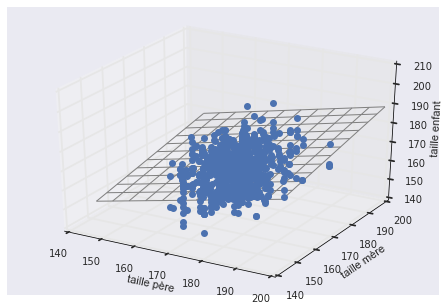

In [392]:
XX = np.arange(145, 200, 0.5)
YY = np.arange(145, 200, 0.5)
xx, yy = np.meshgrid(XX, YY)
fig = plt.figure()
ax = Axes3D(fig)
np.meshgrid(XX, YY)
ax.plot(X['Father'], X['Mother'], y, 'o')
zz = skl_linmod.intercept_ + skl_linmod.coef_[0] * xx + skl_linmod.coef_[1] * yy
# dessiner plan de regression
ax.plot_wireframe(xx, yy, zz, rstride=10, cstride=10, color='grey', linewidth=1)

# labeles
ax.set_xlabel('taille père')
ax.set_ylabel('taille mère')
ax.set_zlabel('taille enfant')

### Q13 Calculer le carré de la norme du vecteur des résidus $\left\|{r}\right\|^{2}$, avec $y_{i} -\hat y_{i}$ .

In [393]:
r_carre = np.dot(y - skl_linmod.predict(X), y - skl_linmod.predict(X))
print_resultat ("residu carre = {}".format(r_carre))

# on peut aussi le calculer avec produit de 2 vecteurs (vdot): 
# r_carre = np.vdot(y - skl_linmod.predict(X), (y - skl_linmod.predict(X)).T)

residu carre = 66544.79558781315


### Q14 Visualiser un estimateur de la densité des résidus.  L’hypothèse de normalité est-elle crédible selon vous? On ajoutera ensuite un estimateur par genre de la densité des résidus (en mettant un facteur proportionnelle au nombre de personnes de chaque genre).

 La distribution des résudus suit une courbe proche d'une courbe normale


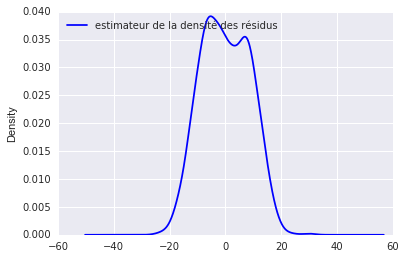

In [394]:

r = y - skl_linmod.predict(X)
r.plot.kde(color='b' , label = 'estimateur de la densité des résidus')

plt.legend(loc='upper left')

print_resultat(" La distribution des résudus suit une courbe proche d'une courbe normale")

 coefs:  0.4821826280623608 0.5178173719376392


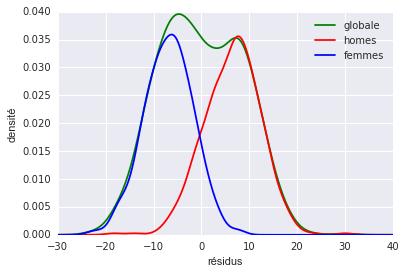

In [395]:
# estimateur par genre de la densité des résidus 
# (en mettant un facteur proportionnelle au nombre de personnes de chaque genre).
df_f = df[df['Gender'] == 'F']
df_g = df[df['Gender'] == 'M']


print (" coefs: ", coef_f, coef_g)
#plot.show()
plt.xlabel('résidus')
plt.ylabel('densité')
kde_r_all = kde.gaussian_kde(df_r_all)
kde_range = np.linspace(-30, 40, 1000)
plt.plot(kde_range, kde_r_all(kde_range), color= 'g', label = "globale")
kde_r_g = kde.gaussian_kde(df_r_g)
plt.plot(kde_range, coef_g * kde_r_g(kde_range), color= 'r', label = "homes")
kde_r_f = kde.gaussian_kde(df_r_f)
plt.plot(kde_range, coef_f * kde_r_f(kde_range), color= 'b', label = "femmes")
plt.legend()
plt.show()

### Q15 Comparer l’influence des deux variables. Laquelle semble la plus explicative ? Tester avant et après centrage et réduction des données.

In [396]:
# données pour modèle
X = df[['Father', 'Mother']]
y = df['Height']

df_tmp = df[['Father', 'Mother', 'Height', 'Kids']] # df que avec des valeurs numériques 
# Fit regression model (with sklearn)
skl_linmod = linear_model.LinearRegression(fit_intercept=True)
skl_linmod.fit(X, y)

print_resultat ("Modèle de régression ")
print ("  θ0 (intercept_)  = " , skl_linmod.intercept_)
print ("  θ1 (coef_Father) = " , skl_linmod.coef_[0])
print ("  θ2 (coef_Mother) = " , skl_linmod.coef_[1])


df_norm = pd.DataFrame(preprocessing.scale(df_tmp.values), columns=df_tmp.columns)

X = df_norm[['Father', 'Mother']]
y = df_norm['Height']
skl_linmod.fit(X, y)

print_resultat ("Modèle de régression avec données centrées normalisées:")
print ("  θ0 (intercept_)  = " , skl_linmod.intercept_)
print ("  θ1 (coef_Father) = " , skl_linmod.coef_[0])
print ("  θ2 (coef_Mother) = " , skl_linmod.coef_[1])


print_resultat ("L'influance de la colonne 'Mother' prédomine dans les 2 cas" )


Modèle de régression 
  θ0 (intercept_)  =  57.6946261269
  θ1 (coef_Father) =  0.382307905018
  θ2 (coef_Mother) =  0.274265674791
Modèle de régression avec données centrées normalisées:
  θ0 (intercept_)  =  -1.18518171808e-16
  θ1 (coef_Father) =  0.260654041501
  θ2 (coef_Mother) =  0.177762661867
L'influance de la colonne 'Mother' prédomine dans les 2 cas


# Exercice 2. (Analyse du jeu de données auto-mpg)

### Q1 Importer avec Pandas la base de données disponible ici https://archive.ics.uci.edu/ ml/machine-learning-databases/auto-mpg/auto-mpg.data-original. On ajoutera le nom des colonnes en consultant l’adresse : https://archive.ics.uci.edu/ml/machine- learning-databases/auto-mpg/auto-mpg.names avec l’attribut 'name' de import_csv. On pourra regarder l’intérêt de l’option sep=r"\s\+" si besoin. Quelle est le marqueur utilisé pour les données manquantes dans le fichier utilisé ? Enlever les lignes possédant des valeurs manquantes dans la base de données si besoin.

In [397]:
# les données sont dans :
# https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original

# nom des colonnes sont dans:
# https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names



url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'

# lire le fichier data et associer les noms des colonnes
auto = pd.read_csv(url, sep=r"\s+"  # , header=0
                   ,
                   names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin',
                          'car_name'])


print_resultat("Le marqueur utilisé pour les valeurs manquantes est : NaN")

# option d'affichage 
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
print_resultat (auto.describe())
# supprimer les enregistrements avec valeurs vide (NaN)
print_resultat("Supression des enregistrements avec valeurs vide (NaN)")
auto = auto.dropna()

print_resultat ( auto.describe())
# print (description)
# print ( auto.describe())


Le marqueur utilisé pour les valeurs manquantes est : NaN
           mpg  cylinders  displacement  horsepower    weight  acceleration    model   origin
count  398.000    406.000       406.000     400.000   406.000       406.000  406.000  406.000
mean    23.515      5.475       194.780     105.082  2979.414        15.520   75.921    1.569
std      7.816      1.712       104.922      38.769   847.004         2.803    3.749    0.797
min      9.000      3.000        68.000      46.000  1613.000         8.000   70.000    1.000
25%     17.500      4.000       105.000      75.750  2226.500        13.700   73.000    1.000
50%     23.000      4.000       151.000      95.000  2822.500        15.500   76.000    1.000
75%     29.000      8.000       302.000     130.000  3618.250        17.175   79.000    2.000
max     46.600      8.000       455.000     230.000  5140.000        24.800   82.000    3.000
Supression des enregistrements avec valeurs vide (NaN)
           mpg  cylinders  displacement  

### Q2 Calculer l’estimateur des moindres carrés ${\hat \theta}$ et sa prédiction ${\hat y}$ sur une sous partie de la base obtenue en gardant les 9 premières lignes. Que constatez-vous pour les variables cylinders et model year ?

In [398]:
# recuperer les 9 premières ligne du DF
auto9 = auto[:9]

# preparation des données pour le modèle
X = auto9[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model']]
y = auto9['mpg']

# Fit regression model (with sklearn)
skl_ln = linear_model.LinearRegression(fit_intercept=True)
skl_ln.fit(X, y)

print_resultat("En utilisant la fonction LinearRegression de sklearn, on obtient les éléments du moindres carrée :")
print("  θ0 (intercept_) = ", skl_ln.intercept_)
print("  θ1 (coef_cylinders) = ", skl_ln.coef_[0])
print("  θ2 (coef_displacement) = ", skl_ln.coef_[1])
print("  θ3 (coef_horsepower) = ", skl_ln.coef_[2])
print("  θ4 (coef_weight) = ", skl_ln.coef_[3])
print("  θ5 (coef_acceleration) = ", skl_ln.coef_[4])
print("  θ6 (coef_model) = ", skl_ln.coef_[5])

print_resultat("On constate que les coefficients les variables 'cylindres' et 'model' sont égales à 0")


En utilisant la fonction LinearRegression de sklearn, on obtient les éléments du moindres carrée :
  θ0 (intercept_) =  30.7716953656
  θ1 (coef_cylinders) =  0.0
  θ2 (coef_displacement) =  0.0540884756683
  θ3 (coef_horsepower) =  -0.094530596162
  θ4 (coef_weight) =  -0.00424073670631
  θ5 (coef_acceleration) =  -0.199367012686
  θ6 (coef_model) =  0.0
On constate que les coefficients les variables 'cylindres' et 'model' sont égales à 0


### Q3 Calculer ${\hat \theta}$  et ${\hat y}$ cette fois sur l’intégralité des données, après les avoir centré et réduit. Quelles sont les deux variables qui expliquent le plus la consommation d’un véhicule ?


In [399]:
# preparer un dataframe temporaire que avec les colones numeriques
tmp = auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin']]

# centrer et normer les données a partir du DF temp en utilisant : preprocessing.scale(array)
# puis recuperer dans un DF
auto_norm = pd.DataFrame(preprocessing.scale(tmp.values), columns=tmp.columns)

Xn = auto_norm[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model']]
yn = auto_norm['mpg']

# Fit regression model (with sklearn)
skl_ln = linear_model.LinearRegression(fit_intercept=True)
skl_ln.fit(Xn, yn)

print_resultat("En utilisant la fonction LinearRegression de sklearn :")
print("  θ0 (intercept_) = ", skl_ln.intercept_)
print("  θ1 (coef_cylinders) = ", skl_ln.coef_[0])
print("  θ2 (coef_displacement) = ", skl_ln.coef_[1])
print("  θ3 (coef_horsepower) = ", skl_ln.coef_[2])
print("  θ4 (coef_weight) = ", skl_ln.coef_[3])
print("  θ5 (coef_acceleration) = ", skl_ln.coef_[4])
print("  θ6 (coef_model) = ", skl_ln.coef_[5])

print_resultat(" Les deux variables qui expliquent le plus la consommation sont:")
print(" - poids")
print(" - année du modèle")


En utilisant la fonction LinearRegression de sklearn :
  θ0 (intercept_) =  5.27885637707e-16
  θ1 (coef_cylinders) =  -0.0720906557912
  θ2 (coef_displacement) =  0.102946946027
  θ3 (coef_horsepower) =  -0.00193000839604
  θ4 (coef_weight) =  -0.739443986449
  θ5 (coef_acceleration) =  0.030141841854
  θ6 (coef_model) =  0.355567398949
 Les deux variables qui expliquent le plus la consommation sont:
 - poids
 - année du modèle


### Q4) Calculer $\left\|{r}\right\|^{2}$ (le carré de la norme du vecteur des résidus), puis $\left\|{r}\right\|^{2}/(p-n)$. Vérifier numériquement que : $\left\|{y-\bar y_{i}1_{n}}\right\|^{2} = \left \| r \right \|^{2} +       \left \| \hat y - \bar y_{n}1_{n} \right \| ^{2}$ 

In [408]:
r = yn - skl_ln.predict(Xn)
r2 = np.dot((yn - skl_ln.predict(Xn)), (yn - skl_ln.predict(Xn)))
print("============================================")
print("residu (r**2) = ", r2)

# puis r2/ n-p
n = auto_norm.shape[0]  # nbr ligne/observations
p = auto_norm.shape[1]
print("============================================")
print("residu (r**2)/ (n-p) = ", r2 / (n - p))

# demonter avec les calculs
print("============================================")
print(" verification avec formule : ")
print()

rg = np.dot((yn - yn.mean()), (yn - yn.mean()))
# rd = np.dot((yn - yn.mean()), (skl_ln.predict(Xn) - yn.mean())) + r2 
rd = np.dot((skl_ln.predict(Xn) - yn.mean()), (skl_ln.predict(Xn) - yn.mean())) + r2

print("equation gauche = ", rg)
print("equation droite = ", rd)
print("gauche == droite == ", round(rg) == round(rd))

residu (r**2) =  74.7719266969
residu (r**2)/ (n-p) =  0.194718559107
 verification avec formule : 

equation gauche =  392.0
equation droite =  392.0
gauche == droite ==  True


### Q5 Supposons que l’on vous fournisse les caractéristiques suivantes d’un nouveau véhicule : {cylinders, displacement, horsepower, weight, acceleration, year} =   {6, 225, 100, 3233, 15.4, 76}. Prédire sa consommation 3.

In [401]:
# modele sur données non normalisées
X2 = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model']]
y2 = auto['mpg']

# Fit regression model (with sklearn)
skl_ln2 = linear_model.LinearRegression(fit_intercept=True)
skl_ln2.fit(X2, y2)

# nouvelle valeurs + vecteur constant
new_values = (1, 6, 225, 100, 3233, 15.4, 76)
coef_modele = (skl_ln2.intercept_
               , skl_ln2.coef_[0]
               , skl_ln2.coef_[1]
               , skl_ln2.coef_[2]
               , skl_ln2.coef_[3]
               , skl_ln2.coef_[4]
               , skl_ln2.coef_[5])

print_resultat("estimation y = ")
print(np.dot(new_values, coef_modele))


estimation y = 
21.7762201826


### Q6 Utiliser la transformation PolynomialFeatures de sklearn sur les données brutes, pour ajuster un modèle d’ordre deux  (avec les termes d’interactions : interaction_only=False). On normalisera et recentrera après avoir créer les nouvelles variables explicatives.

In [402]:
# transformer ld DF en lui rajoutant des colonnes complementaires : x^2, ...
poly = preprocessing.PolynomialFeatures(2, interaction_only=False)
auto_poly = poly.fit_transform(X2)

# fonction permettant de renommer les colonnes avec un libellé compréhensible (récuperation internet)
features = list(X2.columns)
poly_features = []
for powers in poly.powers_:
    combined_features = []
    for i, power in enumerate(powers):
        if power == 1:
            combined_features.append(features[i])
        elif power == 2:
            combined_features.append(features[i] + '²')
    poly_features.append(' x '.join(combined_features))

df_poly = pd.DataFrame(poly.transform(X2))
df_poly.columns = poly_features  # reafectation des noms des colonnes

# supprimer la premiere colonne sans nom
df_poly.drop('', axis=1, inplace=True)

# Fit regression model (with sklearn)
skl_ln3 = linear_model.LinearRegression(fit_intercept=True)
skl_ln3.fit(preprocessing.scale(df_poly), yn)

# print(skl_ln3.coef_.shape)
print_resultat("Liste des coeficients : ")
for i, coef in enumerate(skl_ln3.coef_):
    print("{} :{}".format(i, coef))

print_resultat("Les variables les plus influantes sont :")
print_resultat("{} :{}".format(df_poly.columns[16], skl_ln3.coef_[16]))
print("{} :{}".format(df_poly.columns[26], skl_ln3.coef_[26]))

Liste des coeficients : 
0 :1.7118020556069486
1 :-6.213422587728634
2 :0.6612119066390578
3 :2.24128468234238
4 :-2.059093143662724
5 :-3.4484785634809283
6 :-1.0435944796721857
7 :-0.3781078178470181
8 :1.5332484948313947
9 :0.6847136900832329
10 :0.6256135612029952
11 :-2.0819994876587185
12 :0.16673297635181572
13 :0.4336153741568529
14 :0.667698620310232
15 :-0.42248173115588195
16 :5.604112618994871
17 :-0.46076902665301245
18 :-0.7891122030898337
19 :-0.3061888177717963
20 :-0.6222632194742389
21 :0.4051586176204103
22 :0.10893959474229198
23 :-3.2220545529787215
24 :0.25580807718706794
25 :1.7849302546987964
26 :3.8291643511367375
Les variables les plus influantes sont :
displacement x model :5.604112618994871
model² :3.8291643511367375


### Q7 Proposer une manière de gérer la variable origin, par exemple avec pd.get_dummies. On ajustera un modèle linéaire sans constante dans ce cas. Déterminer laquelle des trois origines est la plus efficace en terme de consommation4.

In [403]:
# spliter la colonne "origin" en 3 colonnes binaires
orig = pd.get_dummies(auto['origin'])

print_resultat("Exemple de transformation de la colonne 'origin'")
print(orig[:5])

# Fit regression model (with sklearn)
skl_ln_orig = linear_model.LinearRegression(fit_intercept=False)
skl_ln_orig.fit(orig, y2)

print_resultat("Coeficients pour les differents pays issues de modèle de regression")
print(skl_ln_orig.coef_)

Exemple de transformation de la colonne 'origin'
   1.0  2.0  3.0
0  1.0  0.0  0.0
1  1.0  0.0  0.0
2  1.0  0.0  0.0
3  1.0  0.0  0.0
4  1.0  0.0  0.0
Coeficients pour les differents pays issues de modèle de regression
[ 20.03346939  27.60294118  30.45063291]


Selon les resultats de notre regression linéaire, le pays avec le plus d'influence est le "Japon"

### Q8 Procéder de même cette fois en fonction de la marque de la voiture. On pourra utiliser str.split et str.replace pour créer une nouvelle variable 'brand'.

In [404]:
# une fonction qui permet de spliter la colonne 'marque de voiture et de remplacer les marques avec nom
def replace(string):
    car = string.split(' ')[0]
    if car in ['chevroelt', 'chevy']:
        car = 'chevrolet'
    car.replace('maxda', 'mazda')
    car.replace('mercedes-benz', 'mercedes')
    car.replace('toyouta', 'toyota')
    if car in ['vokswagen', 'vw']:
        car = 'volkswagen'
    return car

# recation d'une nouvelle conne 'brand'
auto['brand'] = auto['car_name'].apply(replace)
# transformer la collone brand en plusieurs colonnes par marque de voiture
br = pd.get_dummies(auto['brand'])

# Fit regression model (with sklearn)
skl_ln_orig = linear_model.LinearRegression(fit_intercept=False)
skl_ln_orig.fit(br, y2)

print_resultat("Les plus forts coefficients  ont les valeurs : ")
print((sorted(skl_ln_orig.coef_))[-3:])

# print ( "{} :{} \n{} :{}".format(df_poly.columns[16], skl_ln3.coef_[16], df_poly.columns[16]), skl_ln3.coef_[16])
print_resultat("Donc les marques les plus influentes sont : ")
print("{} :{}".format(br.columns[19], skl_ln_orig.coef_[19]))
print("{} :{}".format(br.columns[30], skl_ln_orig.coef_[30]))

print_resultat("Liste des coefficients par ordre des colonnes utilisées dans le modèle : ")
for i, coef in enumerate(skl_ln_orig.coef_):
    print("{} :{}".format(i, coef))


Les plus forts coefficients  ont les valeurs : 
[33.761538461538464, 35.0, 36.0]
Donc les marques les plus influentes sont : 
nissan :36.0
triumph :35.0
Liste des coefficients par ordre des colonnes utilisées dans le modèle : 
0 :18.07037037037037
1 :26.714285714285705
2 :23.75
3 :19.18235294117646
4 :19.749999999999996
5 :25.0
6 :20.21914893617021
7 :17.26666666666667
8 :31.113043478260874
9 :22.060714285714283
10 :28.912499999999998
11 :19.475000000000005
12 :9.0
13 :33.761538461538464
14 :26.05
15 :30.860000000000003
16 :25.399999999999995
17 :23.25
18 :19.118181818181824
19 :36.0
20 :21.1
21 :25.75
22 :23.687500000000004
23 :21.70322580645161
24 :20.012500000000003
25 :29.666666666666675
26 :23.899999999999995
27 :30.524999999999995
28 :28.372000000000003
29 :22.999999999999996
30 :35.0
31 :31.84090909090909
32 :21.11666666666667


### Q9 Reprendre la matrice X obtenue sans variables catégorielles. Obtenez numériquement la SVD de X  = ${USV^T}$ ; vérifier numériquement que H = ${UU^T}$  est une projection orthogonale. La diagonale de cette matrice, forme le vecteur des “leviers”, qu’on ajoutera comme nouvelles variable. Trier la base de données en fonction de cette nouvelle variable, et expli- quer en quoi les voitures qui on les trois plus grands niveau de “levier” sont atypiques.

In [405]:
# Full SVD
print(auto[:5])
auto_svd = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model']]

svd = np.linalg.svd(auto_svd, full_matrices=False)
U = svd[0]
H = np.dot(U, np.transpose(U))
HH = np.dot(H, H)

print_resultat(" H est orthogonale si HH == H == {}".format(np.isclose(HH, H).all()))

#auto_svd['leviers'] =  np.diag(H)



    mpg  cylinders  displacement  horsepower  weight  acceleration  model  origin  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   70.0     1.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   70.0     1.0   
2  18.0        8.0         318.0       150.0  3436.0          11.0   70.0     1.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   70.0     1.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   70.0     1.0   

                    car_name      brand  
0  chevrolet chevelle malibu  chevrolet  
1          buick skylark 320      buick  
2         plymouth satellite   plymouth  
3              amc rebel sst        amc  
4                ford torino       ford  
 H est orthogonale si HH == H == True


In [406]:
def print_resultat(texte):
    print ("============================================")
    print (texte)